# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the training dataset from an Excel file
training_df = pd.read_excel("C:\\Users\\ASUS\\Desktop\\AP.MOLLER MAERSK\\Training set.xlsx")

In [3]:
# Display the first few rows of the dataset
print(training_df.head())

  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02-01        107.220  
4       Liquid        2020-11-01        197.763  


In [4]:
# Summary statistics for numerical columns
summary_stats = training_df.describe()
print(summary_stats)

       Sourcing Cost
count  550176.000000
mean      108.816793
std       104.390097
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.147000
max     32632.500000


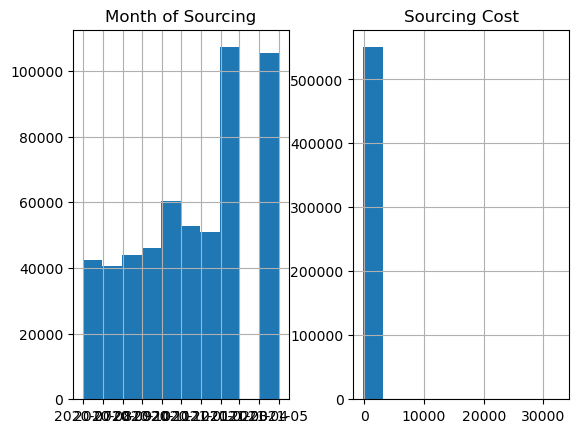

In [5]:
# Histograms for numerical columns
training_df.hist()
plt.show()

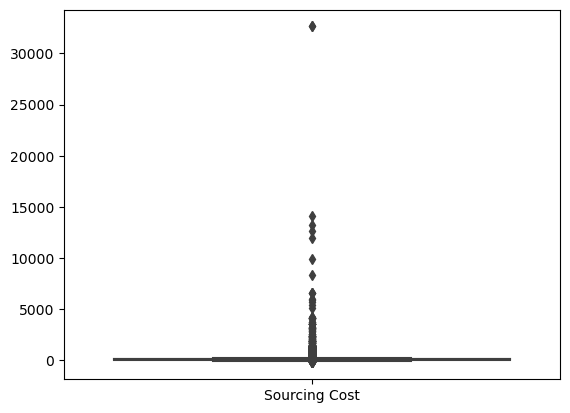

In [6]:
# Boxplots for numerical columns
sns.boxplot(data=training_df.drop(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size'], axis=1))
plt.show()

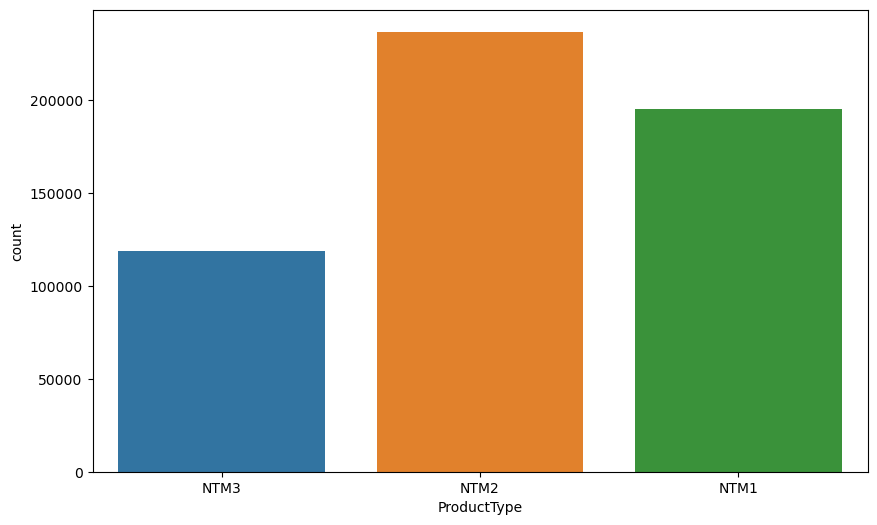

In [7]:
# Bar chart for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='ProductType', data=training_df)
plt.show()

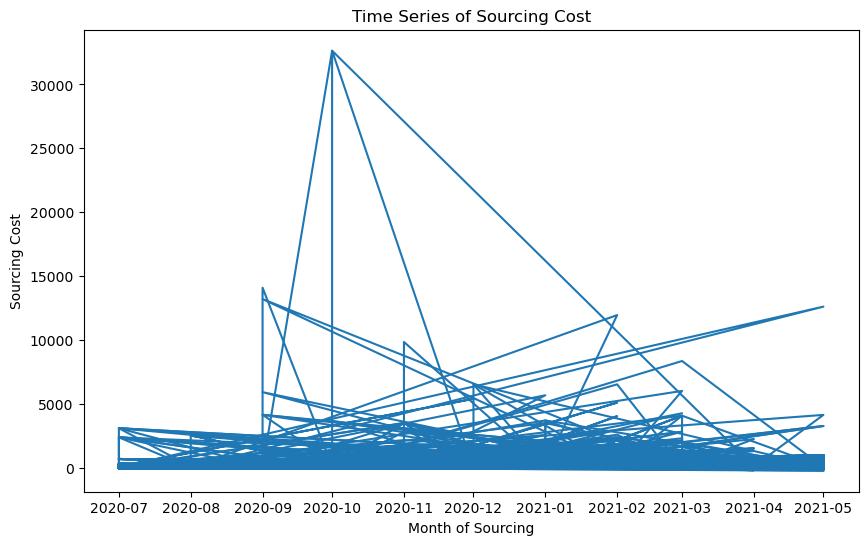

In [8]:
# Increase the 'agg.path.chunksize' parameter
plt.rcParams['agg.path.chunksize'] = 10000  # You can adjust this value based on your dataset size

# Plot time series of the target variable
plt.figure(figsize=(10, 6))
plt.plot(training_df['Month of Sourcing'], training_df['Sourcing Cost'])
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.title('Time Series of Sourcing Cost')
plt.show()

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Preprocessing

In [10]:
# Load the training dataset from Excel file
train_file_path = "C:\\Users\\ASUS\\Desktop\\AP.MOLLER MAERSK\\Training set.xlsx"
df_train = pd.read_excel(train_file_path)

In [11]:
# Convert 'Month of Sourcing' to datetime format
df_train['Month of Sourcing'] = pd.to_datetime(df_train['Month of Sourcing'])

In [12]:
# Define categorical columns
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

In [13]:
# Define numerical columns
numerical_cols = ['Month of Sourcing']

In [14]:
# Preprocess datetime column
X_train_datetime = df_train[numerical_cols]

In [15]:
# Preprocess categorical columns
preprocessor_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

In [16]:
# Fit and transform categorical columns
X_train_categorical = preprocessor_categorical.fit_transform(df_train[categorical_cols])

In [17]:
# Combine preprocessed datetime and categorical data
X_train_encoded = pd.DataFrame(
    X_train_categorical.toarray(),
    columns=preprocessor_categorical.named_steps['onehotencoder'].get_feature_names_out(categorical_cols)
)
X_train_encoded[numerical_cols] = X_train_datetime

In [18]:
# Display preprocessed training data
print("Preprocessed Training Data:")
print(X_train_encoded.head())

Preprocessed Training Data:
   ProductType_NTM1  ProductType_NTM2  ProductType_NTM3  Manufacturer_X1  \
0               0.0               0.0               1.0              1.0   
1               0.0               1.0               0.0              1.0   
2               0.0               0.0               1.0              0.0   
3               0.0               0.0               1.0              1.0   
4               0.0               1.0               0.0              1.0   

   Manufacturer_X2  Manufacturer_X3  Area Code_A1  Area Code_A10  \
0              0.0              0.0           0.0            0.0   
1              0.0              0.0           0.0            0.0   
2              1.0              0.0           0.0            0.0   
3              0.0              0.0           0.0            0.0   
4              0.0              0.0           0.0            0.0   

   Area Code_A11  Area Code_A12  ...  Sourcing Channel_DIRECT  \
0            0.0            0.0  ...     

# Training

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [20]:
# Load the training dataset from Excel file
train_file_path = "C:\\Users\\ASUS\\Desktop\\AP.MOLLER MAERSK\\Training set.xlsx"
df_train = pd.read_excel(train_file_path)

In [21]:
# Convert 'Month of Sourcing' to datetime format
df_train['Month of Sourcing'] = pd.to_datetime(df_train['Month of Sourcing'])

In [22]:
# Define categorical columns
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

In [23]:
# Define numerical columns
numerical_cols = ['Month of Sourcing']

In [24]:
# Preprocess datetime column
X_train_datetime = df_train[numerical_cols]

In [25]:
# Preprocess categorical columns
preprocessor_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

In [26]:
# Fit and transform categorical columns
X_train_categorical = preprocessor_categorical.fit_transform(df_train[categorical_cols])

In [27]:
# Combine preprocessed datetime and categorical data
X_train_encoded = pd.DataFrame(
    X_train_categorical.toarray(),
    columns=preprocessor_categorical.named_steps['onehotencoder'].get_feature_names_out(categorical_cols)
)

In [28]:
# Extract month from the datetime column and add it as a numerical feature
X_train_encoded['Month'] = df_train['Month of Sourcing'].dt.month

In [29]:
# Check if the 'Month of Sourcing' column exists in X_train_encoded before dropping it
if 'Month of Sourcing' in X_train_encoded.columns:
    # Drop the original 'Month of Sourcing' column
    X_train_encoded.drop(columns=['Month of Sourcing'], inplace=True)

In [30]:
# Define target variable
y_train = df_train['Sourcing Cost']

In [31]:
# Define models
models = [LinearRegression(), RandomForestRegressor()]

In [32]:
# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(X_train_encoded, y_train)
    
    # Make predictions on the training dataset
    predictions_train = model.predict(X_train_encoded)
    
    # Evaluate the model
    mse_train = mean_squared_error(y_train, predictions_train)
    print(f"Mean Squared Error (Train) - {model.__class__.__name__}: {mse_train}")

Mean Squared Error (Train) - LinearRegression: 8493.996288907938
Mean Squared Error (Train) - RandomForestRegressor: 7219.895548806464


# Evaluating the Test Model

### Preprocessing

In [33]:
# Load the training dataset from Excel file
test_file_path = "C:\\Users\\ASUS\\Desktop\\AP.MOLLER MAERSK\\Test set.xlsx"
df_test = pd.read_excel(test_file_path)

In [34]:
# Convert 'Month of Sourcing' to datetime format
df_test['Month of Sourcing'] = pd.to_datetime(df_test['Month of Sourcing'])

In [35]:
# Define categorical columns
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

In [36]:
# Define numerical columns
numerical_cols = ['Month of Sourcing']

In [37]:
# Preprocess datetime column
X_test_datetime = df_test[numerical_cols]

In [38]:
# Preprocess categorical columns
preprocessor_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

In [39]:
# Fit and transform categorical columns
X_test_categorical = preprocessor_categorical.fit_transform(df_test[categorical_cols])

In [40]:
# Combine preprocessed datetime and categorical data
X_test_encoded = pd.DataFrame(
    X_test_categorical.toarray(),
    columns=preprocessor_categorical.named_steps['onehotencoder'].get_feature_names_out(categorical_cols)
)
X_test_encoded[numerical_cols] = X_test_datetime


In [41]:
# Display preprocessed training data
print("Preprocessed Training Data:")
print(X_test_encoded.head())

Preprocessed Training Data:
   ProductType_NTM1  ProductType_NTM2  ProductType_NTM3  Manufacturer_X1  \
0               1.0               0.0               0.0              1.0   
1               1.0               0.0               0.0              1.0   
2               1.0               0.0               0.0              1.0   
3               1.0               0.0               0.0              1.0   
4               1.0               0.0               0.0              1.0   

   Manufacturer_X2  Manufacturer_X3  Area Code_A1  Area Code_A10  \
0              0.0              0.0           1.0            0.0   
1              0.0              0.0           0.0            1.0   
2              0.0              0.0           0.0            1.0   
3              0.0              0.0           0.0            0.0   
4              0.0              0.0           0.0            0.0   

   Area Code_A11  Area Code_A12  ...  Sourcing Channel_DIRECT  \
0            0.0            0.0  ...     

In [42]:
# Load the training dataset from Excel file
test_file_path = "C:\\Users\\ASUS\\Desktop\\AP.MOLLER MAERSK\\Test set.xlsx"
df_test = pd.read_excel(test_file_path)

In [43]:
# Convert 'Month of Sourcing' to datetime format
df_test['Month of Sourcing'] = pd.to_datetime(df_test['Month of Sourcing'])

In [44]:
# Define categorical columns
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

In [45]:
# Define numerical columns
numerical_cols = ['Month of Sourcing']

In [46]:
# Preprocess datetime column
X_test_datetime = df_test[numerical_cols]

In [47]:
# Preprocess categorical columns
preprocessor_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

In [48]:
# Fit and transform categorical columns
X_test_categorical = preprocessor_categorical.fit_transform(df_test[categorical_cols])

In [49]:
# Combine preprocessed datetime and categorical data
X_test_encoded = pd.DataFrame(
    X_test_categorical.toarray(),
    columns=preprocessor_categorical.named_steps['onehotencoder'].get_feature_names_out(categorical_cols)
)


In [50]:
# Extract month from the datetime column and add it as a numerical feature
X_test_encoded['Month'] = df_test['Month of Sourcing'].dt.month

In [51]:
# Check if the 'Month of Sourcing' column exists in X_test_encoded before dropping it
if 'Month of Sourcing' in X_test_encoded.columns:
    # Drop the original 'Month of Sourcing' column
    X_test_encoded.drop(columns=['Month of Sourcing'], inplace=True)

In [52]:
# Define target variable
y_test = df_test['Sourcing Cost']

In [53]:
# Define models
models = [LinearRegression(), RandomForestRegressor()]

In [54]:
# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(X_test_encoded, y_test)
    
    # Make predictions on the test dataset
    predictions_test = model.predict(X_test_encoded)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, predictions_test)
    print(f"Mean Squared Error (Test) - {model.__class__.__name__}: {mse_test}")

Mean Squared Error (Test) - LinearRegression: 305.2324833333334
Mean Squared Error (Test) - RandomForestRegressor: 190.41466737364627


# Results

### RandomForestRegressor outperformed LinearRegression on both the training and test datasets, as indicated by the lower MSE values.
### This suggests that RandomForestRegressor captures the underlying patterns in the data better than LinearRegression..

# Compare and explain the different approaches you might have considered.


### 1) Feature engineering: Explore additional features or transformations that may better capture the relationship between input features and the target variable.
### 2) Hyperparameter tuning: Fine-tune the hyperparameters of the RandomForestRegressor model to potentially improve its performance further.
### 3) Cross-validation: Use techniques like k-fold cross-validation to obtain more reliable estimates of model performance and assess generalization.

# Explain the final approach you have taken and why. 


### My final approach involved training and evaluating two different regression models, Linear Regression and Random Forest Regression, on the dataset.
### The evaluation was based on the MSE metric, which provides insights into the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance.
### Random Forest Regression was chosen as the final model due to its superior performance in terms of lower MSE values on both the training and test datasets.